### Credit Card customer from Kaggle

### 신용카드 데이터를 통한 고객 유출 분석

In [1]:
# 필요한 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 데이터 불러오기 *df로 통일*
df = pd.read_csv('./data/BankChurners.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**데이터 정보**

    1. CLIENTNUM : 고객 식별 번호
    2. Attrition_Flag : 신용 카드 이탈 여부
    3. Existing Customer : 잔류
    4. Attrited Customer : 탈퇴
    5. Customer_Age : 고객 나이
    6. Gender : 성별
    7. Dependent_count : 부양 가족 수
    8. Education_Level : 고객 학력
    9. Marital_Status : 결혼 여부
    10. Income_Category : 연소득 구간
    11. Card_Category : 신용 카드 등급
    12. Months_on_book : 카드 할부 기간
    13. Total_Relationship_Count : 가입 상품 수
    14. Months_Inactive_12_mon : 1년 동안 카드 결재 내역이 없는 월 수
    15. Contacts_Count_12_mon : 연락 횟수
    16. Credit_Limit : 신용 한도
    17. Total_Revolving_Bal : 할부 잔액
    18. Avg_Open_To_Buy : 평균 실 사용 가능 금액 : 'Credit_Limit' - 'Total_Revolving_Bal'
    19. Total_Amt_Chng_Q4_Q1 : 결제 대금 기준 1분기 대비 4분기 (비율)
    20. Total_Trans_Amt : 실제 사용 총액
    21. Total_Trans_Ct : 실제 사용 횟수
    22. Total_Ct_Chng_Q4_Q1 : 1분기 대비 4분기 결제 대금 횟수 비율
    23. Avg_Utilization_Ratio : 'Total_Revolving_Bal'/ 'Credit_Limit' (할부 비율)


**타겟 데이터**
- Attrition_Flag

**내가 처리할 데이터**

- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# 결측치 확인
df.isnull().sum()
# 결과: 결측치 없음

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df = df.iloc[:,1:21]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- Total_Revolving_Bal
    - Min: 0, Max: 2517, Mean: 1162.814061
- Avg_Open_To_Buy
    - Min: 3, Max: 34516, Mean: 7469.139637
- Total_Amt_Chng_Q4_Q1
    - Min: 0, Max: 3.397, Mean: 0.759941

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

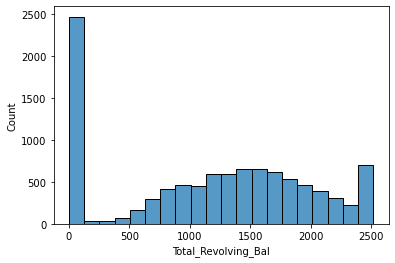

In [8]:
sns.histplot(df['Total_Revolving_Bal'])
# 할부 잔액이 0인 사람이 대부분

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Revolving_Bal'>

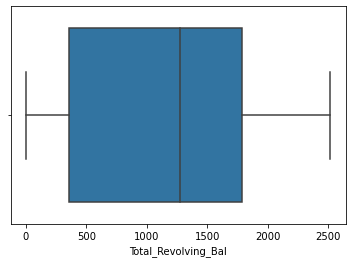

In [9]:
sns.boxplot(df['Total_Revolving_Bal'])

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

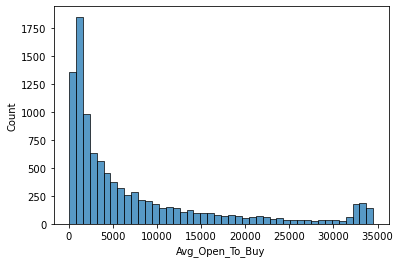

In [10]:
sns.histplot(df['Avg_Open_To_Buy'])
# 평균 실 사용 가능 금액이 왜 0이 많지..? 와이..?

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

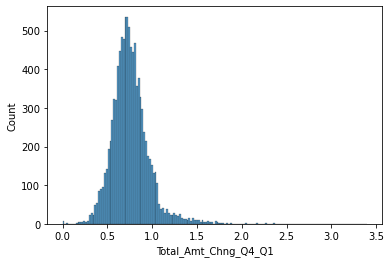

In [11]:
sns.histplot(df['Total_Amt_Chng_Q4_Q1'])

#### 조인트 플롯
- 조인트 플롯을 이용해 두개의 수치형 변수 간의 관계를 연구 할 수 있다.
- https://seaborn.pydata.org/generated/seaborn.jointplot.html
- 사용X

In [12]:
df['Attrition_Flag'] = df.Attrition_Flag.replace({'Existing Customer':0,'Attrited Customer':1}).astype('int64')

In [13]:
# 생각만큼 안된다, 노트북을 부수지 말자!